In [2]:
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [67]:
# Lists of classifiers, selectors, and aggregation metrics
classifiers = ["logisticregression", "randomf", "xgb"]
selectors = ["lasso", "mrmr", "anova"]
aggregations = ["largest", "unweighted", "weighted", "3largest"]

base_path = "/Users/laiacoronassala/Desktop/predicting_immunotherapy_response/"
data_list = []

# Iterate through all combinations
for agg in aggregations:
    folder = "results"+agg
    folder_path = os.path.join(base_path, folder)
    for clf in classifiers:
        for sel in selectors:
            file_name = f"{sel}_{clf}.json"
            file_path = os.path.join(folder_path, file_name)
            print(file_name)
            if os.path.exists(file_path):
                with open(file_path, 'r') as file:
                    data = json.load(file)
                data_list.append({
                    "aggregation": agg,
                    "classifier": clf,
                    "selector": sel,
                    "average_auc": data["Average_AUC"],
                    "std_dev_auc": data["Standard_Deviation_AUC"]
                })

lasso_logisticregression.json
mrmr_logisticregression.json
anova_logisticregression.json
lasso_randomf.json
mrmr_randomf.json
anova_randomf.json
lasso_xgb.json
mrmr_xgb.json
anova_xgb.json
lasso_logisticregression.json
mrmr_logisticregression.json
anova_logisticregression.json
lasso_randomf.json
mrmr_randomf.json
anova_randomf.json
lasso_xgb.json
mrmr_xgb.json
anova_xgb.json
lasso_logisticregression.json
mrmr_logisticregression.json
anova_logisticregression.json
lasso_randomf.json
mrmr_randomf.json
anova_randomf.json
lasso_xgb.json
mrmr_xgb.json
anova_xgb.json
lasso_logisticregression.json
mrmr_logisticregression.json
anova_logisticregression.json
lasso_randomf.json
mrmr_randomf.json
anova_randomf.json
lasso_xgb.json
mrmr_xgb.json
anova_xgb.json


In [69]:
df=pd.DataFrame(data_list)
# df.to_csv("nestedcv_results.csv")

In [5]:
print(max(df['average_auc']))

0.8013095238095239


/Users/laiacoronassala/opt/anaconda3/envs/envlaia/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/laiacoronassala/opt/anaconda3/envs/envlaia/lib/python3.12/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/laiacoronassala/opt/anaconda3/envs/envlaia/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  func(*plot_args, **plot_kwargs)
/Users/laiacoronassala/opt/anaconda3/envs/envlaia/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `line

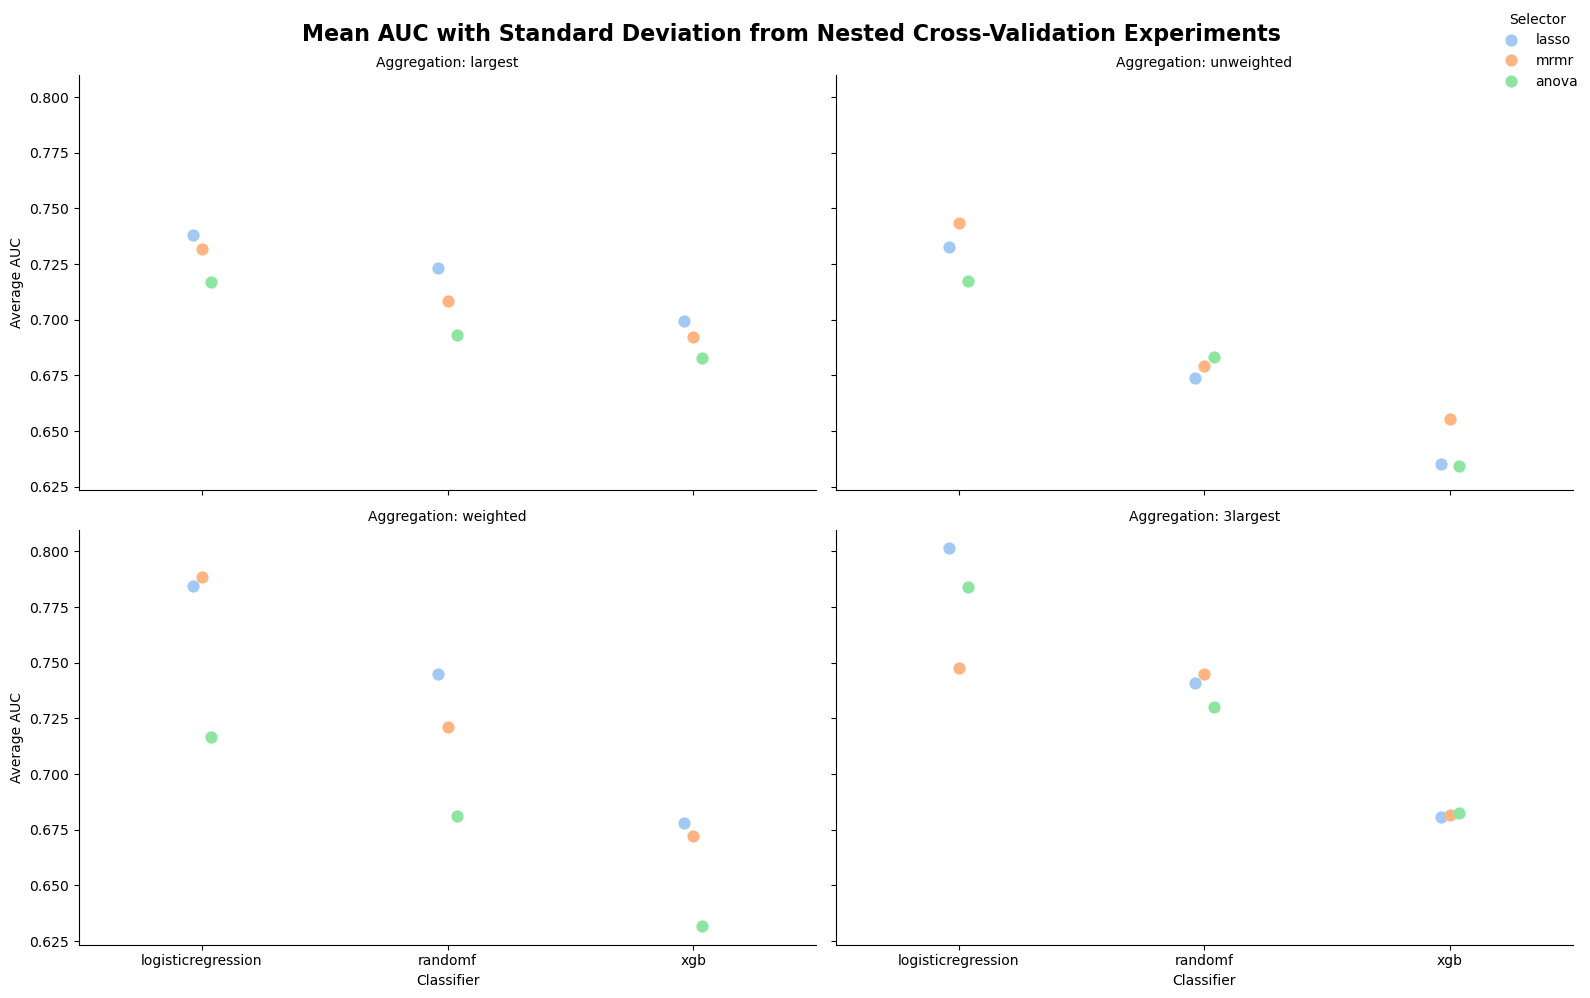

In [6]:
# Use a vibrant color palette
palette_vibrant = sns.color_palette("pastel", 3)
# Create the adjusted FacetGrid of pointplots
g = sns.FacetGrid(df, col="aggregation", col_wrap=2, height=5, aspect=1.5, sharey=True)
#g.map(sns.pointplot, "classifier", "average_auc", "selector", ci="std_dev_auc", join=False, markers='o', linestyles='', palette=palette_vibrant, dodge=True, capsize=0.2)
g.map(sns.pointplot, "classifier", "average_auc", "selector", join=False, markers='o', linestyles='', palette=palette_vibrant, dodge=True, capsize=0.2)
g.add_legend(title="Selector",loc = 1)
#plt.errorbar(df['classifier'], df['average_auc'], yerr=df['std_dev_auc'], fmt='o', color=color, capsize=5, label='std')

# Adjust titles and labels
g.set_axis_labels("Classifier", "Average AUC")
g.set_titles("Aggregation: {col_name}")
plt.subplots_adjust(top=0.92)
g.fig.suptitle("Mean AUC with Standard Deviation from Nested Cross-Validation Experiments", fontsize=16, fontweight='bold')

# Display the plots
plt.tight_layout()
plt.show()

/Users/laiacoronassala/opt/anaconda3/envs/envlaia/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/laiacoronassala/opt/anaconda3/envs/envlaia/lib/python3.12/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/laiacoronassala/opt/anaconda3/envs/envlaia/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  func(*plot_args, **plot_kwargs)
/Users/laiacoronassala/opt/anaconda3/envs/envlaia/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `line

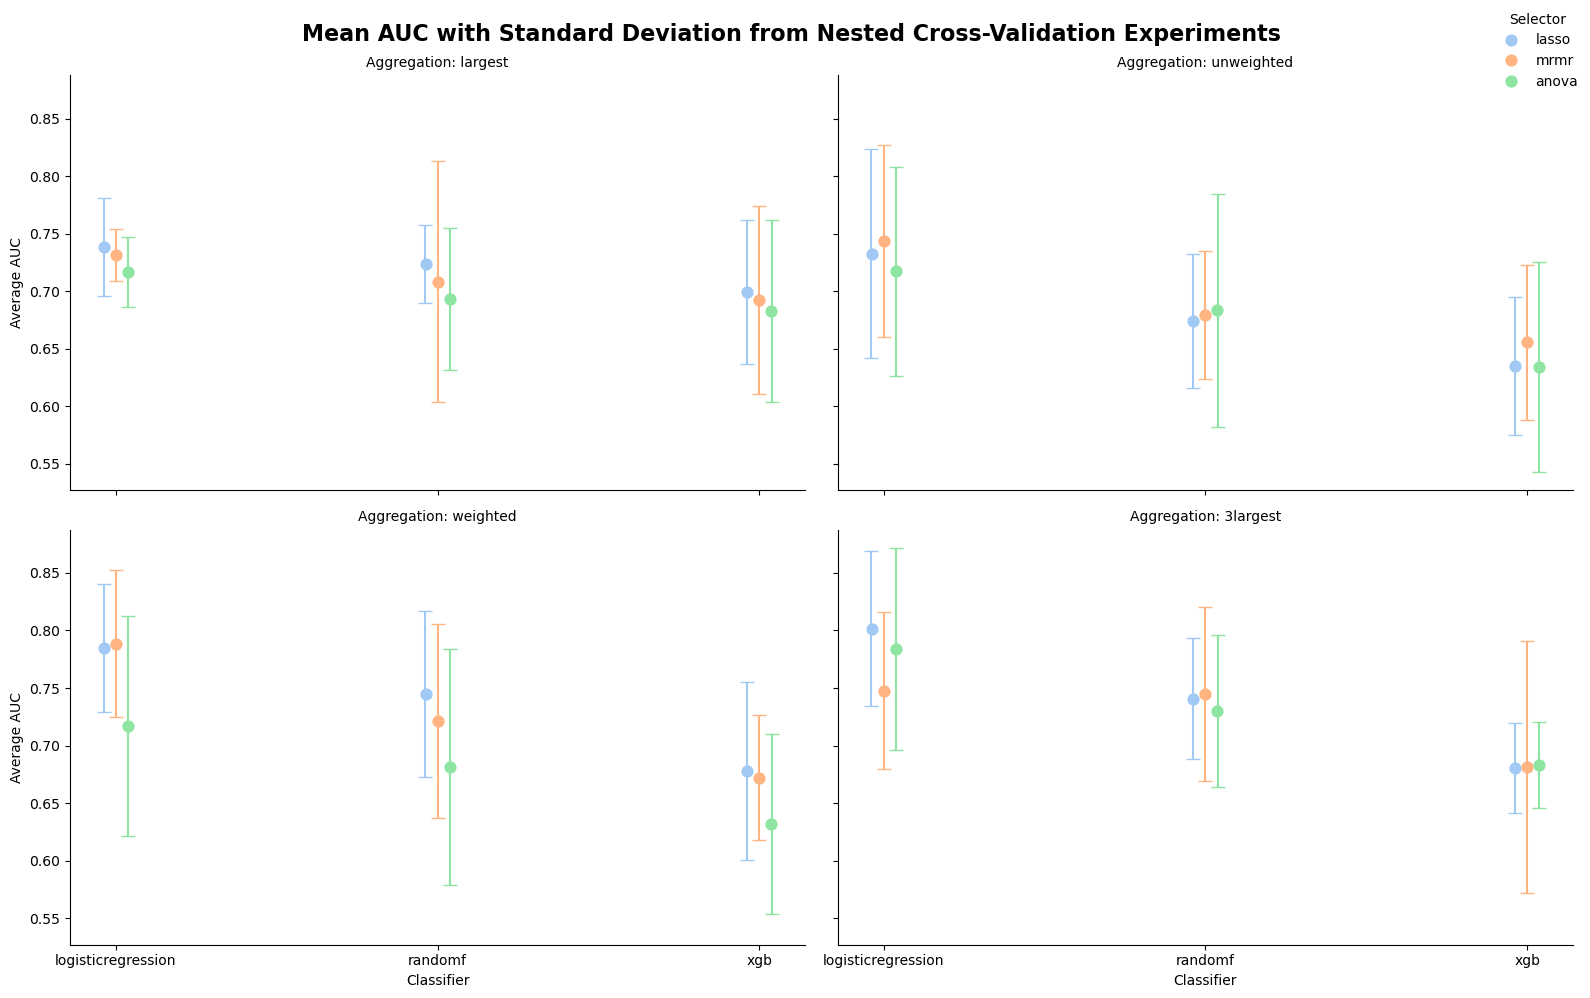

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


palette_vibrant = sns.color_palette("pastel", len(df['selector'].unique()))

g = sns.FacetGrid(df, col="aggregation", col_wrap=2, height=5, aspect=1.5, sharey=True)
g.map(sns.pointplot, "classifier", "average_auc", "selector", 
      join=False, markers='o', linestyles='', palette=palette_vibrant, dodge=True)

num_selectors = len(df['selector'].unique())
dodge_amount = 0.038

for ax, agg in zip(g.axes.flatten(), df['aggregation'].unique()):
    subset = df[df['aggregation'] == agg]
    classifiers = subset['classifier'].unique()
    for i, selector in enumerate(subset['selector'].unique()):
        subset_selector = subset[subset['selector'] == selector]
        xvals = np.arange(len(classifiers)) + dodge_amount * (i - (num_selectors - 1) / 2)
        color = palette_vibrant[i]  
        ax.errorbar(xvals, subset_selector['average_auc'], 
                    yerr=subset_selector['std_dev_auc'], fmt='none', 
                    capsize=5, color=color)

g.set_axis_labels("Classifier", "Average AUC")
g.set_titles("Aggregation: {col_name}")
plt.subplots_adjust(top=0.92)
g.fig.suptitle("Mean AUC with Standard Deviation from Nested Cross-Validation Experiments", 
               fontsize=16, fontweight='bold')
g.add_legend(title="Selector",loc = 1)
plt.tight_layout()
plt.show()


### Additional Plots for understanding the results

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

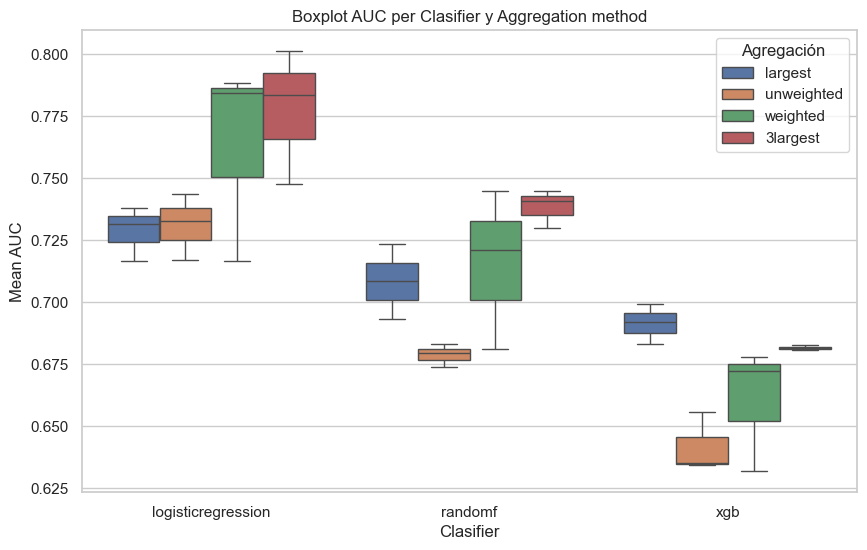

In [70]:
# 1. Boxplot #
# we can see: 3largest is generally better, logistic regression is generally better
plt.figure(figsize=(10, 6))
sns.boxplot(x='classifier', y='average_auc', hue='aggregation', data=df)
plt.title('Boxplot AUC per Clasifier y Aggregation method')
plt.ylabel('Mean AUC')
plt.xlabel('Clasifier')
plt.legend(title='Agregación')
plt.show()

/var/folders/r_/_x49m5kn0v98s1f52zqmrt1m0000gn/T/ipykernel_1162/2567230121.py:6: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(x='classifier', y='average_auc', hue='selector', data=df, capsize=.2, errwidth=0)


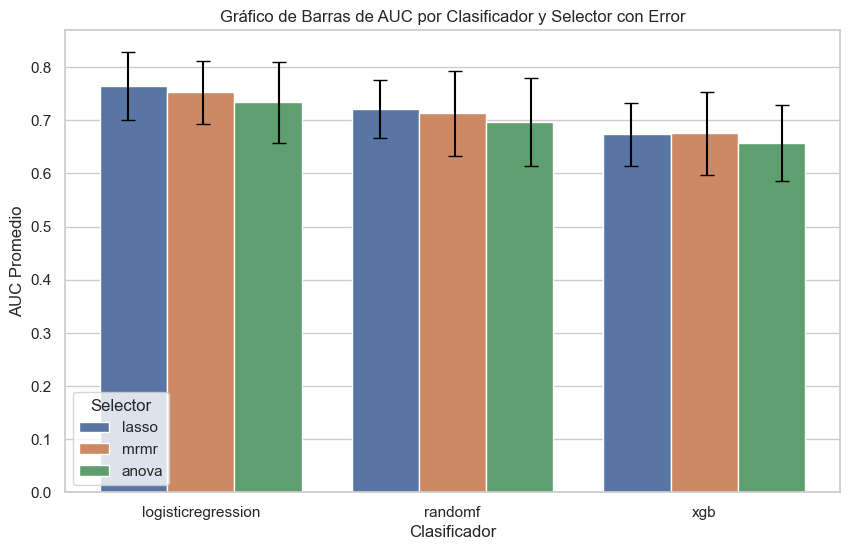

In [90]:
#barplot
#logistic and lasso are in general always better independently from the aggregation method used
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='classifier', y='average_auc', hue='selector', data=df, capsize=.2, errwidth=0)

mean_std_dev = df.groupby(['classifier', 'selector'])['std_dev_auc'].mean().reset_index()

for i, classifier in enumerate(df['classifier'].unique()):
    for j, selector in enumerate(df['selector'].unique()):
        std_err = mean_std_dev[(mean_std_dev['classifier'] == classifier) & (mean_std_dev['selector'] == selector)]['std_dev_auc']
        plt.errorbar(i + j * 0.3-0.29,  
                     df[(df['classifier'] == classifier) & (df['selector'] == selector)]['average_auc'].mean(),  
                     yerr=std_err, fmt='none', color='black', capsize=5)

plt.title('Gráfico de Barras de AUC por Clasificador y Selector con Error')
plt.ylabel('AUC Promedio')
plt.xlabel('Clasificador')
plt.legend(title='Selector')
plt.show()


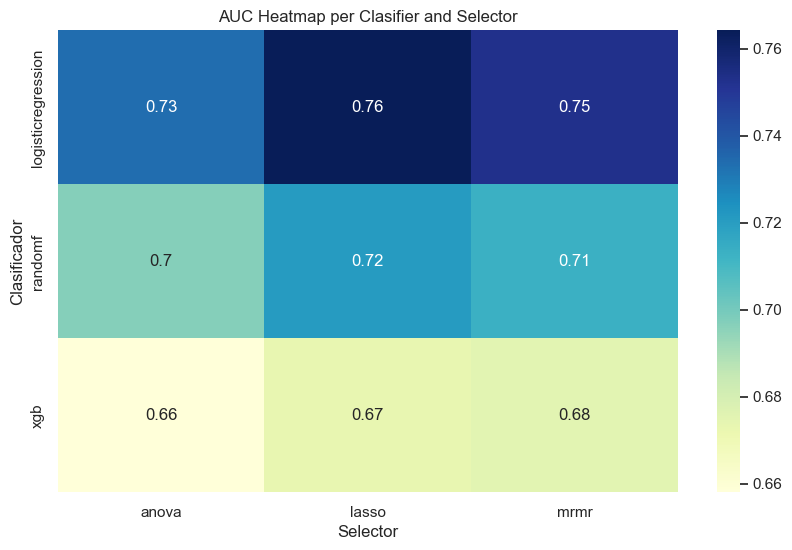

In [91]:
#heatmap
pivot_df = df.pivot_table(values='average_auc', index='classifier', columns='selector', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, cmap="YlGnBu")
plt.title('AUC Heatmap per Clasifier and Selector')
plt.ylabel('Clasificador')
plt.xlabel('Selector')
plt.show()

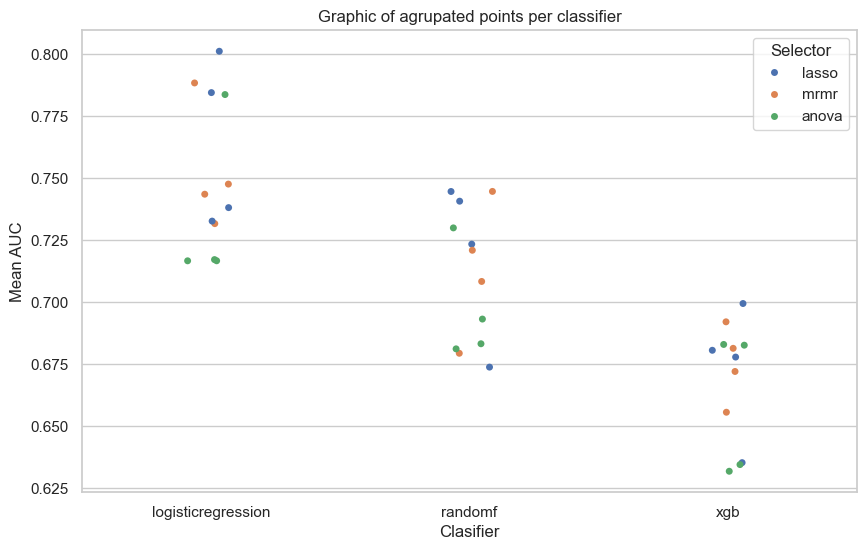

In [92]:
#graphic grouped points
#logistic is better
plt.figure(figsize=(10, 6))
sns.stripplot(x='classifier', y='average_auc', hue='selector', data=df, jitter=True)
plt.title('Graphic of agrupated points per classifier')
plt.ylabel('Mean AUC')
plt.xlabel('Clasifier')
plt.legend(title='Selector')
plt.show()

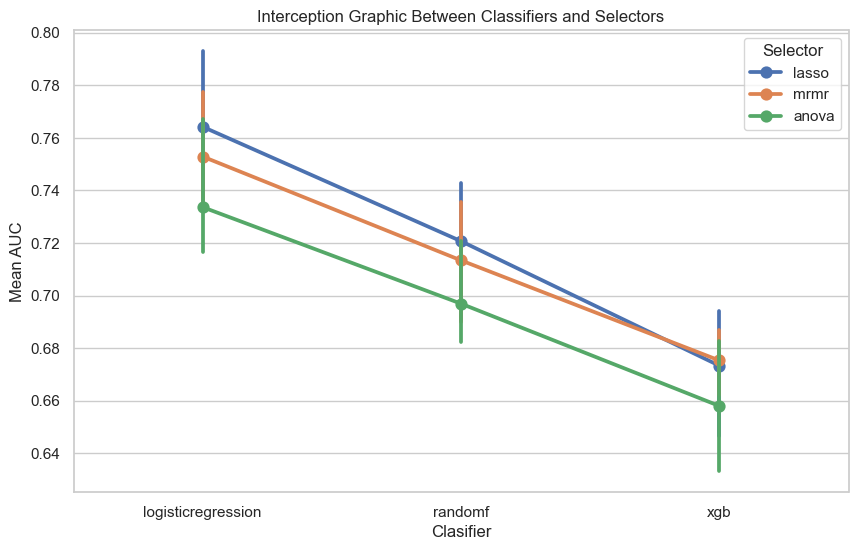

In [93]:
# Interception Graphic
# we want the intercept between the classifiers and selectors
plt.figure(figsize=(10, 6))
sns.pointplot(x='classifier', y='average_auc', hue='selector', data=df)
plt.title('Interception Graphic Between Classifiers and Selectors')
plt.ylabel('Mean AUC')
plt.xlabel('Clasifier')
plt.legend(title='Selector')
plt.show()

/var/folders/r_/_x49m5kn0v98s1f52zqmrt1m0000gn/T/ipykernel_1162/454226182.py:16: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.barplot(
/var/folders/r_/_x49m5kn0v98s1f52zqmrt1m0000gn/T/ipykernel_1162/454226182.py:16: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.barplot(
/var/folders/r_/_x49m5kn0v98s1f52zqmrt1m0000gn/T/ipykernel_1162/454226182.py:16: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.barplot(
/var/folders/r_/_x49m5kn0v98s1f52zqmrt1m0000gn/T/ipykernel_1162/454226182.py:16: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.barplot(


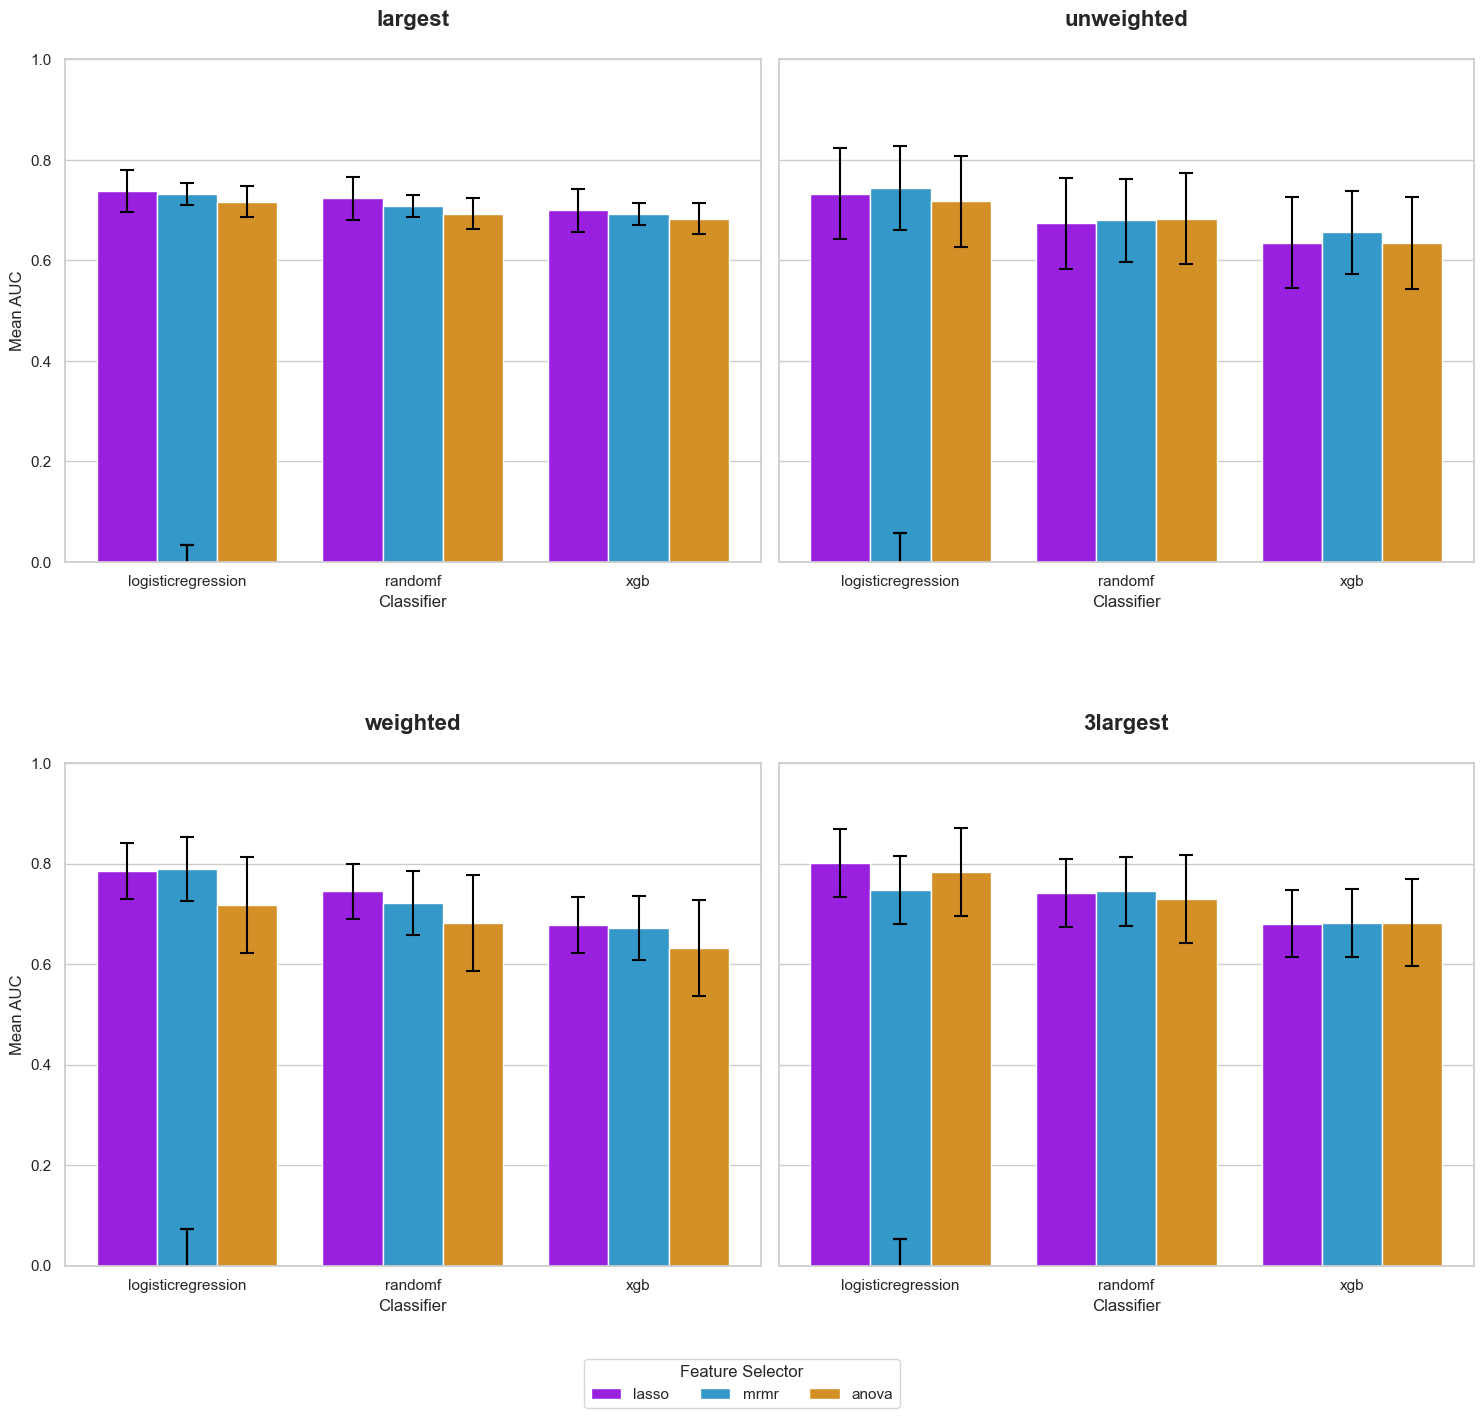

In [23]:
# Set up the matplotlib figure with subplots
# Since we have only 5 aggregators, we use a 3x2 grid but leave the last plot empty
fig, axes = plt.subplots(2, 2, figsize=(15, 15), sharey=True)  # 3x2 subplot grid, sharing y axis
axes = axes.ravel()  # Flatten the array of axes for easy iteration

# Custom colors for each feature selector
selector_colors = ["#a200ff", "#1ba1e2", "#f09609"]

# Loop over each aggregator and create a subplot
for i, agg in enumerate(aggregations):
    # Filter the DataFrame for the current aggregator
    agg_df = df[df['aggregation'] == agg]
    
    # Create the barplot for the current aggregator
    ax = axes[i]
    sns.barplot(
        ax=ax,
        x="classifier", 
        y="average_auc", 
        hue="selector", 
        data=agg_df, 
        palette=selector_colors, 
        capsize=0.1,
        errwidth=1
    )
    
    # Customize each subplot
    ax.set_title(f'{agg}', fontsize=16, fontweight='bold', y=1.05)  # Increase fontsize and adjust title position
    ax.set_xlabel('Classifier')
    ax.set_ylabel('Mean AUC')
    ax.set_ylim(0, 1)  # Assuming AUC cannot exceed 1
    
    # Manually add error bars
    for j, bar in enumerate(ax.patches):
        # Calculate the error for the current bar
        error = agg_df.iloc[j // len(classifiers)]['std_dev_auc']
        # Place the error bars on the bars
        ax.errorbar(x=bar.get_x() + bar.get_width() / 2,
                    y=bar.get_height(),
                    yerr=error,
                    ecolor='black',
                    capsize=5,
                    elinewidth=1.5,
                    capthick=1.5)
    
    # Remove the legends from all subplots
    ax.get_legend().remove()

# Remove the empty subplot (if we have an odd number of aggregators)
if len(aggregations) % 2 != 0:
    fig.delaxes(axes[-1])

# Tight layout to ensure no overlap
plt.tight_layout()
plt.subplots_adjust(hspace=0.4)  # Increase vertical spacing

# Place the legend outside of the subplots at the bottom
# We only need to get the handles and labels once since they are the same for all subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0.05), ncol=len(selectors), title="Feature Selector")

# Adjust the bottom to make space for the legend
plt.subplots_adjust(bottom=0.15)

# Show the plot
plt.show()


/var/folders/r_/_x49m5kn0v98s1f52zqmrt1m0000gn/T/ipykernel_1162/2201321320.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/r_/_x49m5kn0v98s1f52zqmrt1m0000gn/T/ipykernel_1162/2201321320.py:37: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
/var/folders/r_/_x49m5kn0v98s1f52zqmrt1m0000gn/T/ipykernel_1162/2201321320.py:37: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.barplot(


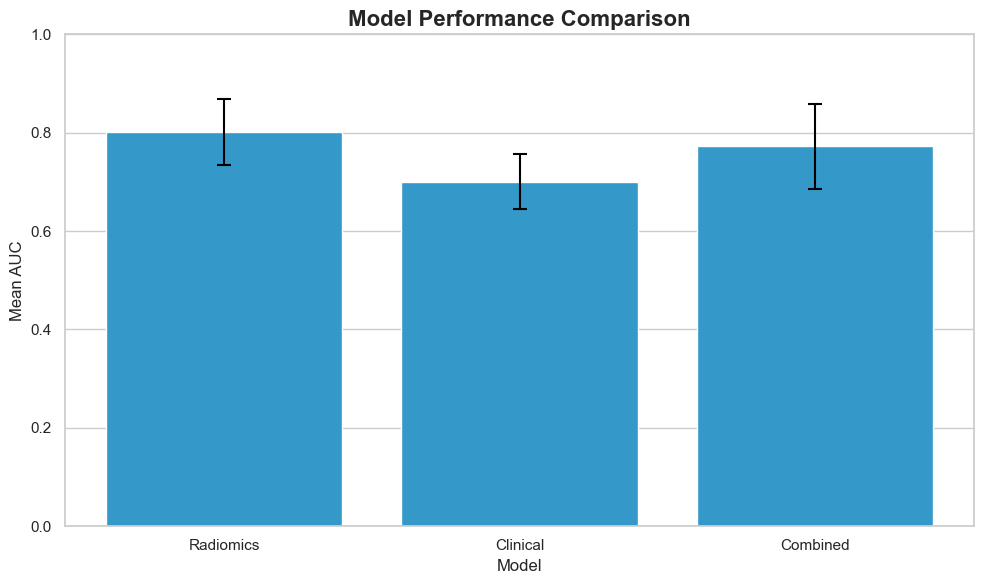

In [64]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargando los datos de los archivos JSON proporcionados
file_paths = [
    "/Users/laiacoronassala/Desktop/predicting_immunotherapy_response/results3largest/lasso_logisticregression.json",
    "/Users/laiacoronassala/Desktop/predicting_immunotherapy_response/clinicalonly.json",
    "/Users/laiacoronassala/Desktop/predicting_immunotherapy_response/combinedmodel.json"
]

# Función para cargar datos de un archivo JSON
def load_data(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

# Cargando los datos
data_list = [load_data(file_path) for file_path in file_paths]

# Creando un DataFrame con los datos cargados
model_names = ['Radiomics', 'Clinical', 'Combined']
df = pd.DataFrame({
    'Model': model_names,
    'Mean AUC': [data['Average_AUC'] for data in data_list],
    'Std Dev': [data['Standard_Deviation_AUC'] for data in data_list]
})

# Set up the matplotlib figure for the single subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Custom color for the bars
bar_color = "#1ba1e2"

# Create the barplot
sns.barplot(
    ax=ax,
    x="Model", 
    y="Mean AUC", 
    data=df, 
    palette=[bar_color], 
    capsize=0.1,
    errwidth=1
)

# Customize the plot
ax.set_title('Model Performance Comparison', fontsize=16, fontweight='bold')
#ax.set_xlabel('Model')
ax.set_ylabel('Mean AUC')
ax.set_ylim(0, 1)  # Assuming AUC cannot exceed 1

# Manually add error bars
for j, bar in enumerate(ax.patches):
    # Calculate the error for the current bar
    error = df.iloc[j]['Std Dev']
    # Place the error bars on the bars
    ax.errorbar(x=bar.get_x() + bar.get_width() / 2,
                y=bar.get_height(),
                yerr=error,
                ecolor='black',
                capsize=5,
                elinewidth=1.5,
                capthick=1.5)

plt.tight_layout()  # Tight layout to ensure no overlap

# Show the plot
plt.show()
